In [164]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [165]:
cancer = load_breast_cancer()

In [166]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [167]:
print(cancer['data'].shape)

(569, 30)


In [168]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'],['target']))

In [169]:
print(df_cancer.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [170]:
#sns.pairplot(df_cancer, vars = cancer['feature_names'])

In [171]:
columns_names = cancer['feature_names']
print(columns_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [172]:
len(columns_names)

30

In [173]:
def index(data):
    dl = dict()
    for i in range(len(data)):
        dl.update({i:data[i]})
    print(dl)
index(columns_names)

{0: 'mean radius', 1: 'mean texture', 2: 'mean perimeter', 3: 'mean area', 4: 'mean smoothness', 5: 'mean compactness', 6: 'mean concavity', 7: 'mean concave points', 8: 'mean symmetry', 9: 'mean fractal dimension', 10: 'radius error', 11: 'texture error', 12: 'perimeter error', 13: 'area error', 14: 'smoothness error', 15: 'compactness error', 16: 'concavity error', 17: 'concave points error', 18: 'symmetry error', 19: 'fractal dimension error', 20: 'worst radius', 21: 'worst texture', 22: 'worst perimeter', 23: 'worst area', 24: 'worst smoothness', 25: 'worst compactness', 26: 'worst concavity', 27: 'worst concave points', 28: 'worst symmetry', 29: 'worst fractal dimension'}


In [174]:

selected_columns = columns_names[0:4]





In [175]:

# help(sns.pairplot)

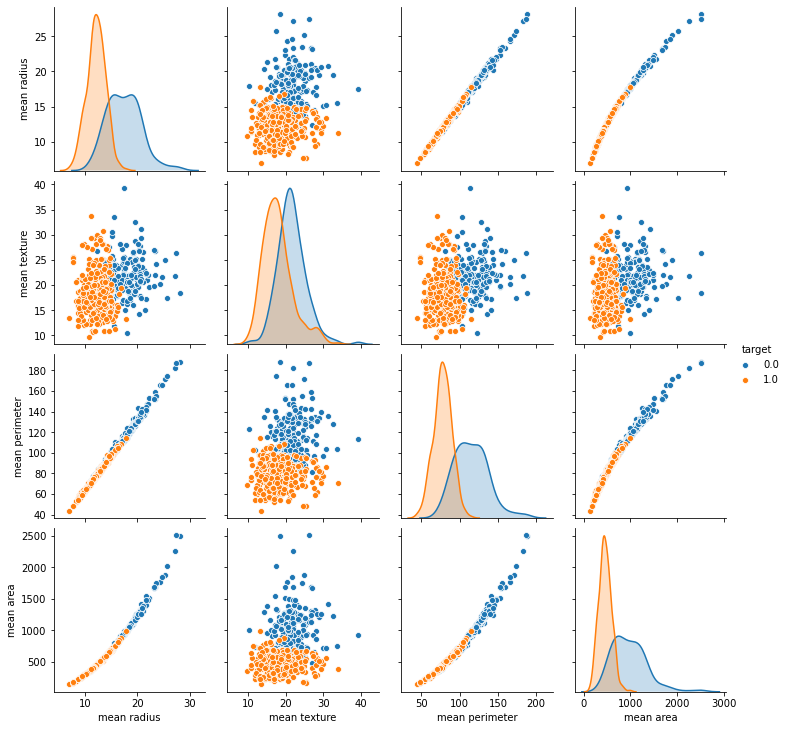

In [176]:
sns.pairplot(df_cancer,hue = 'target', vars = selected_columns)

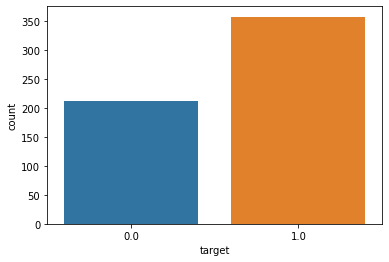

In [177]:
sns.countplot(df_cancer['target'])

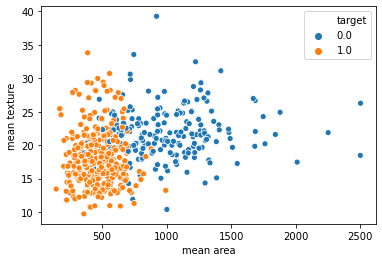

In [178]:
sns.scatterplot(x = "mean area", y = "mean texture", hue = 'target',data = df_cancer)

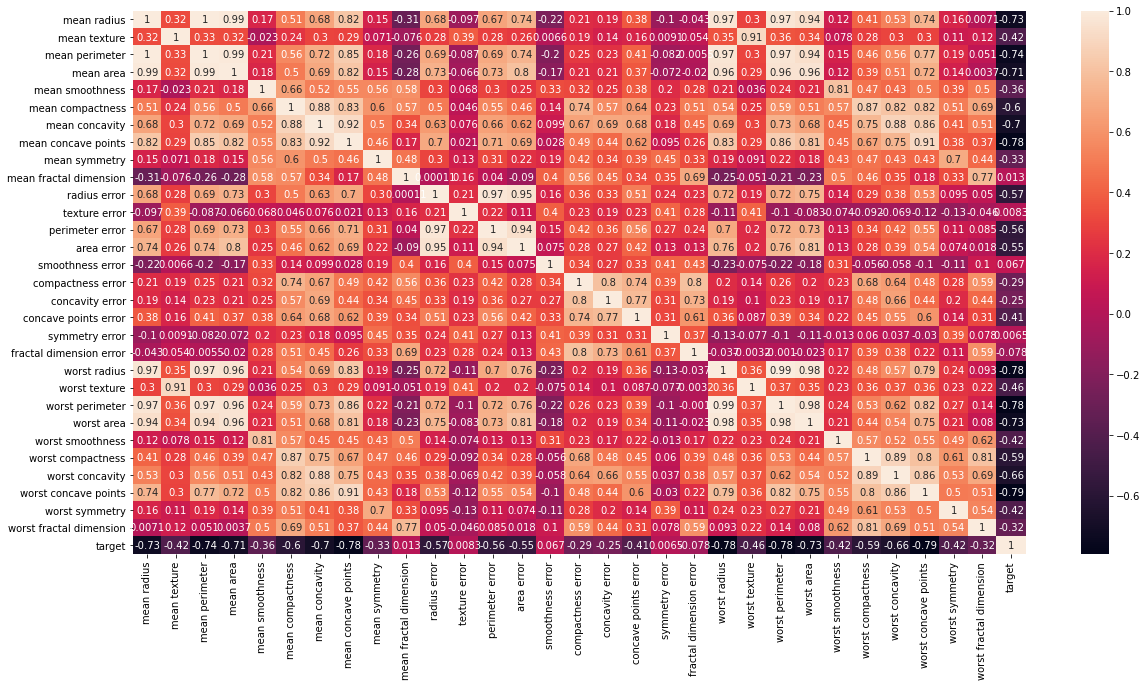

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.heatmap(df_cancer.corr(), annot = True)

In [180]:
# Evaluation model
from sklearn.model_selection import train_test_split
X = df_cancer.drop(['target'], axis = 1)
y = df_cancer['target']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 10)

In [182]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.07483,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.52030,0.21150,0.2834,0.08234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,11.28,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,15.49,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182


In [183]:
#!conda install -c anaconda scikit-learn


In [184]:
from sklearn.svm import SVC
svc_model = SVC()

In [185]:
# fit the model to the training data
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [186]:
y_predict = svc_model.predict(X_test)

In [187]:
from sklearn.metrics import classification_report, confusion_matrix

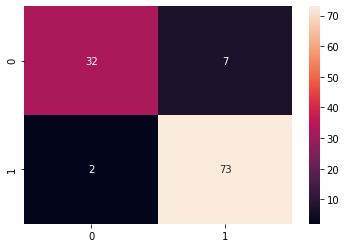

In [188]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [189]:
# Normalization for train set
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train
#Normalization for test set
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

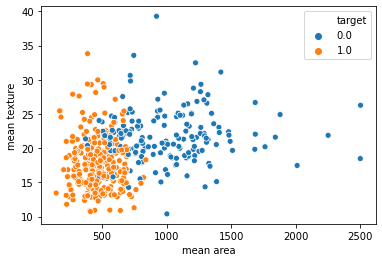

In [190]:
#Plot 2 features to see the difference 
sns.scatterplot(x = "mean area", y = "mean texture", hue = y_train,data = X_train)


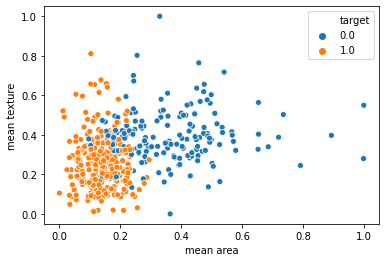

In [191]:
sns.scatterplot(x = "mean area", y = "mean texture", hue = y_train,data = X_train_scaled)

In [192]:
# Improving model by hyperparameter tunning
#Grid search
svc_model.fit(X_train_scaled, y_train)
y_predict_2 = svc_model.predict(X_test_scaled)

In [193]:
print(y_predict_2)

[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.]


In [194]:
cm2 = confusion_matrix(y_test, y_predict_2)

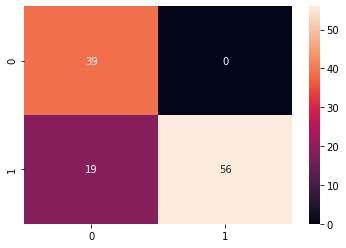

In [195]:
sns.heatmap(cm2, annot = True)

In [196]:
param_grid = [{'kernel': ['rbf'], 'gamma': [10,1,0.1,0.01],
                     'C': [0.1,1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100]},{'kernel': ['poly'], 'gamma': [10,1,0.1,0.01],
                     'C':[0.1,1, 10, 100]},{'kernel': ['sigmoid'], 'gamma': [10,1,0.1,0.01],
                     'C': [0.1,1, 10, 100]}]

In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [199]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] .

[CV] .................. C=0.1, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] .................. C=0.1, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] .................. C=0.1, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] .................. C=0.1, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=10, kernel=sigmoid .................................
[CV] .................. C=0.1, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] .................. C=100, gamma=10, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [200]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [201]:
y_predict_grid = grid.predict(X_test_scaled)

In [202]:
cm_grid = confusion_matrix(y_test, y_predict_grid)

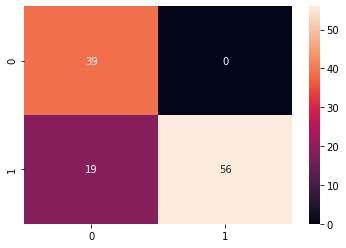

In [203]:
sns.heatmap(cm_grid, annot = True)

In [205]:
print(classification_report(y_test, y_predic_grid))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        39
         1.0       1.00      0.65      0.79        75

    accuracy                           0.77       114
   macro avg       0.80      0.83      0.77       114
weighted avg       0.86      0.77      0.78       114

